In [1]:
!pwd

/home/alan_khang/dev/YOLOF-MaskV2-mmcv


In [1]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.2.2 cuda: True
mmdetection: 3.3.0
mmcv: 2.0.0
mmengine: 0.10.7


# My model

In [2]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/unipercepnet_v2.py'
ckpt_file = '/home/alan_khang/Desktop/unipercepnet_v2/epoch_12.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cuda:0') 

Loads checkpoint by local backend from path: /home/alan_khang/Desktop/unipercepnet_v2/epoch_12.pth


In [3]:
image = mmcv.imread('./datasets/coco2017/coco_test_dev2017/coco_test2017/000000000063.jpg', channel_order='bgr')
result = inference_detector(model, image)

In [4]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/alan_khang/miniconda3/envs/unipercepnet_v2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


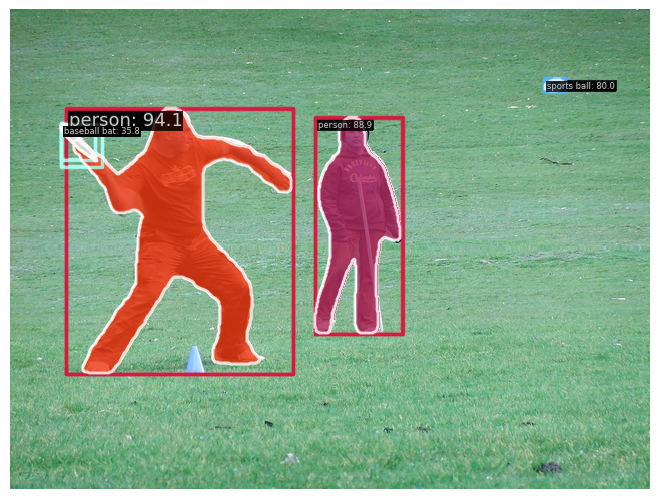

In [5]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    pred_score_thr=0.3,
    wait_time=0,)
visualizer.show()